<a href="https://colab.research.google.com/github/mimkd13/PersianText-SA-DL/blob/main/Filimo_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Library Imports**

hazm, dadmatools, and parsivar are specific to Persian language processing for tokenization, stemming, and normalization.

In [ ]:
!pip install hazm
!pip install dadmatools
!pip install parsivar
#----------------------------
import numpy as np
import nltk
import re
import string
import warnings
import gensim
import dadmatools
from sklearn.metrics.pairwise import cosine_similarity
from configparser import ConfigParser
from functools import reduce
from gensim.models import Doc2Vec
import pandas as pd

from hazm import *
import hazm as hazm
from dadmatools.normalizer import *
from parsivar import *

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 892.6/892.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 8.5 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=e5d6a3ab1cc7631b1231cf4c2f5cb162906e1199399ae118d0f206bb2edf2595
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.4/427.4 kB 22.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.9/457.9 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 38

**2. Loading the Dataset**

In [ ]:
# Load and preprocess the data
try:
    data = pd.read_csv('/content/drive/MyDrive/Notebooks/filimocom_filterd.csv', encoding='utf-8')
    print("Data loaded successfully.")
except Exception as e:
    print(f"Error loading data: {e}")

داده‌ها با موفقیت بارگذاری شدند.


In [ ]:
# print data information
print('data information')
print(data.info(), '\n')

# print missing values information
print('missing values stats')
print(data.isnull().sum(), '\n')

# print some missing values
print('some missing values')
#print(data[data['rate'].isnull()].iloc[:5], '\n')

data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11476 entries, 0 to 11475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11476 non-null  object
 1   time    11476 non-null  object
 2   type    11476 non-null  object
dtypes: object(3)
memory usage: 269.1+ KB
None 

missing values stats
text    0
time    0
type    0
dtype: int64 

some missing values


In [ ]:
print("Head of the DataFrame:")
print(data.head())

Head of the DataFrame:
                                                text                 time  \
0  ادمین محترم فضای گالری آفلاین محدود یا نامحدود...  2019-10-30 12:13:12   
1  حجم ایرانسل رایگان نیست که نیم بهاست چرا همه ج...  2019-10-30 03:49:32   
2  تبریک میگم.این تخفیف تا کی ادامه داره؟ما دوماه...  2019-10-30 04:12:52   
3  هزار برابر نت کم میکنی شرتت پاره نشه 20 درصد ت...  2019-10-30 04:51:00   
4  سلام ببخشید من از طریق مرورگر تلویزیون وارد فی...  2019-10-30 10:02:47   

      type  
0  comment  
1  comment  
2  comment  
3  comment  
4  comment  


In [ ]:
# Convert the 'text' column to string type AND remove all occurrences of commas from the text using the str.replace() function.
data['text'] = data['text'].astype(str).str.replace('،', '') #VIRGOL

**Preprocessing**
  1. Normalizer with Hazm

In [ ]:
normalizer = hazm.Normalizer()
data['normalized_text']= data['text'].apply(normalizer.normalize)

In [ ]:
data['normalized_text']

,normalized_text
0,ادمین محترم فضای گالری آفلاین محدود یا نامحدود...
1,حجم ایرانسل رایگان نیست که نیم بهاست چرا همه‌ج...
2,تبریک میگم. این تخفیف تا کی ادامه داره؟ ما دوم...
3,هزار برابر نت کم می‌کنی شرتت پاره نشه ۲۰ درصد ...
4,سلام ببخشید من از طریق مرورگر تلویزیون وارد فی...
...,...
11471,چرا قابلیت دانلود پولی فیلمارو به سایتتون اضاف...
11472,چرا با‌ای پی ایران پخش نمیشه هیچی!!!!! خیلی عج...
11473,سعی کنیم ارتباطات واقعی انسانی را بر ارتباطات ...
11474,سلام به صفحه ما سر بزنید. صفحه ما فقط یک صفحه ...


**Preprocessing**
  1. Normalizer with DadmaTools

This module can apply various transformations for normalization on Persian texts using the parameters above, and with the function below, all the aforementioned processes are applied to the text.

In [ ]:
from dadmatools.normalizer import Normalizer
normalizer = Normalizer(
    full_cleaning=False,
    unify_chars=True,
    refine_punc_spacing=True,
    remove_extra_space=True,
    remove_puncs=False,
    remove_html=False,
    remove_stop_word=False,
    replace_email_with="<EMAIL>",
    replace_number_with=None,
    replace_url_with="",
    replace_mobile_number_with=None,
    replace_emoji_with=None,
    replace_home_number_with=None
)
dadma_normalizer = Normalizer(full_cleaning=True,remove_html=True, remove_stop_word=True, replace_emoji_with=None)
data['dadma_normalized_text'] = data['text'].apply(dadma_normalizer.normalize)

In [ ]:
data['dadma_normalized_text']

,dadma_normalized_text
0,ادمین محترم فضای گالری آفلاین محدود نامحدود
1,حجم ایرانسل رایگان نیم بهاست تبلیغ رایگان
2,تبریک میگم تخفیف ادامه داره دوماه اشتراکمون با...
3,نت شرتت نشه درصد تخفیف میدی زررررررت
4,سلام ببخشید مرورگر تلویزیون وارد فیلیمو میشم ف...
...,...
11471,قابلیت دانلود پولی فیلمارو سایتتون اضافه نمیکن...
11472,ایران پخش نمیشه عجیبه فیلتر تکلیف دوستانی اکان...
11473,ارتباطات انسانی ارتباطات مجازی انسانی روباتیک ...
11474,سلام صفحه بزنید صفحه صفحه تجاری نقد معرفی فیلم...


Preprocessing

2. Word Tokenization

We perform the tokenization process using the relevant module in the Hazm library. It is worth mentioning that tokenization can be done in two ways: at the sentence level or the word level. Naturally, given the current outlook I have for the future of this project, I believe word-level tokenization will perform better.

In [ ]:
tokenized_list = []
# Initialize WordTokenizer with replace_hashtags and replace_ids set to True (Default is false)
Word_tokenizer = hazm.WordTokenizer(replace_hashtags=True, replace_ids=True)
for row in data['dadma_normalized_text']:
    tokenized_list.append(Word_tokenizer.tokenize(row))

for index, tokens in enumerate(tokenized_list[:25]):
    print(f"سطر {index + 1}:\nتوکن‌ها: {tokens}\n")


سطر 1:
توکن‌ها: ['ادمین', 'محترم', 'فضای', 'گالری', 'آفلاین', 'محدود', 'نامحدود']

سطر 2:
توکن‌ها: ['حجم', 'ایرانسل', 'رایگان', 'نیم', 'بهاست', 'تبلیغ', 'رایگان']

سطر 3:
توکن‌ها: ['تبریک', 'میگم', 'تخفیف', 'ادامه', 'داره', 'دوماه', 'اشتراکمون', 'باقیمونده']

سطر 4:
توکن‌ها: ['نت', 'شرتت', 'نشه', 'درصد', 'تخفیف', 'میدی', 'زررررررت']

سطر 5:
توکن‌ها: ['سلام', 'ببخشید', 'مرورگر', 'تلویزیون', 'وارد', 'فیلیمو', 'میشم', 'فیلم', 'پخش', 'نمیکنه']

سطر 6:
توکن‌ها: ['فیلم', 'نوشتید', 'زیرنویس', 'فارسی', 'نمیاره', 'درحالی', 'زیرنویس']

سطر 7:
توکن‌ها: ['پیگیری', 'نصف', 'فیلمایی', 'علامت', 'علامت', 'پاک', 'حالی', 'اسمشون', 'برنامه', 'سرچ', 'علامتِ', 'نشانه', 'فعال', 'نمایششون', 'نمیده']

سطر 8:
توکن‌ها: ['فیلم', 'خوبی', 'العاده', 'داستان', 'واقعیه']

سطر 9:
توکن‌ها: ['ممنون', 'اپلیکیشن', 'خوبتون', 'فصول', 'سریال', 'سریال', 'مردگان', 'متحرک', 'بترسید', 'دوبله', 'کنین', 'سریال', 'طرفدار', 'زیادی', 'دارن', 'تماشای', 'دوبله', 'خصوص', 'واسه', 'افراد', 'مسن', 'زبان', 'انگلیسی', 'آشنایی', 'دارن']

سطر 1

In [ ]:
# Count total elements in the tokenized list
total_elements = sum(len(tokens) for tokens in tokenized_list)

# Count empty elements
empty_elements_count = sum(1 for tokens in tokenized_list if not tokens)

# Remove empty elements and save the result in a new list
filtered_tokenized_list = [tokens for tokens in tokenized_list if tokens]

# Print the results
print(f"Total elements: {total_elements}")
print(f"Number of empty elements: {empty_elements_count}")


Total elements: 132562
Number of empty elements: 1


In [ ]:
#Array_Test
tokenized_list[1999]

['مردان', 'ایکس', 'ندیدم', 'میخام', 'فصل', 'پیکس', 'بلایندرز', 'ببینم']

In [ ]:
import pickle

# List of tokens
tokenized_list = [...]  # Place your list here

# Save to a pickle file in the specified path
with open("/content/drive/MyDrive/Notebooks/filimo_tokenized_list.pkl", "wb") as file:
    pickle.dump(tokenized_list, file)

print("The list was saved successfully.")


The list was saved successfully.


  3. Lemmatization
  
In this section, we perform lemmatization using the Lemmatizer module from the Hazm library. Lemmatization is the process of reducing words to their base or dictionary form. This step is crucial for unifying variations of the same word
 and improving the accuracy of subsequent text analysis.

In [ ]:
lemmatizer = hazm.Lemmatizer()
lemmatized_comments = []
for words in filtered_tokenized_list:
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_comments.append(lemmatized_words)

In [ ]:
for index, tokens in enumerate(lemmatized_comments[:25]):
    print(f"سطر {index + 1}:\nبن‌واژه‌ها: {tokens}\n")

سطر 1:
بن‌واژه‌ها: ['ادمین', 'محترم', 'فضای', 'گالری', 'آفلاین', 'محدود', 'نامحدود']

سطر 2:
بن‌واژه‌ها: ['حجم', 'ایرانسل', 'رایگان', 'نیم', 'بهاست', 'تبلیغ', 'رایگان']

سطر 3:
بن‌واژه‌ها: ['تبریک', 'میگ', 'تخفیف', 'ادامه', 'داره', 'دوماه', 'اشتراکمون', 'باقیمونده']

سطر 4:
بن‌واژه‌ها: ['نت', 'شرت', 'نشه', 'درصد', 'تخفیف', 'میدی', 'زررررررت']

سطر 5:
بن‌واژه‌ها: ['سلام', 'بخشید#بخش', 'مرورگر', 'تلویزیون', 'وارد', 'فیلیمو', 'میشم', 'فیلم', 'پخش', 'نمیکنه']

سطر 6:
بن‌واژه‌ها: ['فیلم', 'نوشت#نورد', 'زیرنویس', 'فارسی', 'نمیاره', 'درحال', 'زیرنویس']

سطر 7:
بن‌واژه‌ها: ['پیگیری', 'نصف', 'فیلمایی', 'علامت', 'علامت', 'پاک', 'حالی', 'اسمشون', 'برنامه', 'سرچ', 'علامتِ', 'نشانه', 'فعال', 'نمایششون', 'نمیده']

سطر 8:
بن‌واژه‌ها: ['فیلم', 'خوبی', 'العاده', 'داستان', 'واقعیه']

سطر 9:
بن‌واژه‌ها: ['ممنون', 'اپلیکیشن', 'خوبتون', 'فصول', 'سریال', 'سریال', 'مردگان', 'متحرک', 'ترسید#ترس', 'دوبله', 'کنین', 'سریال', 'طرفدار', 'زیادی', 'دارن', 'تماشای', 'دوبله', 'خصوص', 'واسه', 'افراد', 'مسن', 'زبان', 'ا

In [ ]:
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296187 sha256=a1b377af15e62d6ba297def7944059706dae3b6eefd90baa0388e75d5a27fc35
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
# Cloning the official fastText repository (Optional)
# This step is not strictly required to run FastText, but it may be useful for reference.
!git clone https://github.com/facebookresearch/fastText.git

# Downloading a pre-trained Persian FastText model
# This gives you a pre-trained embedding for Persian words.
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.bin.gz

# Decompressing the downloaded model file
!gunzip cc.fa.300.bin.gz


Cloning into 'fastText'...
remote: Enumerating objects: 3998, done.
remote: Counting objects: 100% (995/995), done.
remote: Compressing objects: 100% (171/171), done.
remote: Total 3998 (delta 886), reused 824 (delta 824), pack-reused 3003 (from 2)
Receiving objects: 100% (3998/3998), 8.30 MiB | 25.76 MiB/s, done.
Resolving deltas: 100% (2527/2527), done.
--2025-01-02 13:08:38--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.172.185.104, 18.172.185.63, 18.172.185.43, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.172.185.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4502524724 (4.2G) [application/octet-stream]
Saving to: ‘cc.fa.300.bin.gz’

cc.fa.300.bin.gz    100%[===================>]   4.19G  32.3MB/s    in 2m 3s   

2025-01-02 13:10:41 (34.9 MB/s) - ‘cc.fa.300.bin.gz’ saved [4502524724/4502524724]



In [ ]:
import fasttext

# Loading the pre-trained FastText model
# 'cc.fa.300.bin' is the Persian FastText embeddings file
ft = fasttext.load_model('cc.fa.300.bin')

# Example usage: Find the nearest neighbors to the given Persian phrase
neighbors = ft.get_nearest_neighbors('هوش مصنوعی')
print(neighbors)


[(0.8088415861129761, 'هوشمصنوعی'), (0.7026421427726746, 'شیرمصنوعی'), (0.701546311378479, 'ومصنوعی'), (0.7009400725364685, 'نورمصنوعی'), (0.6918334364891052, 'نیمه\u200cمصنوعی'), (0.6630370020866394, 'صنوعی'), (0.5502080321311951, 'مصنوعیگل'), (0.5443315505981445, 'مصنوعی2013'), (0.5439041256904602, 'منتظریان'), (0.5428822040557861, 'مصنوعیشوفر')]


In [ ]:
import numpy as np

# Final list to store embeddings for each sentence
embeddings_per_sentence = []

# Process sentences and compute embeddings
for tokens in lemmatized_comments:
    sentence_embedding = []
    for token in tokens:
        try:
            # Extract the embedding for each word
            word_vector = ft.get_word_vector(token)
            sentence_embedding.append(word_vector)
        except KeyError:
            # Ignore words not present in the model
            pass

    # Calculate the average embedding for each sentence
    if sentence_embedding:
        average_embedding = np.mean(sentence_embedding, axis=0)
        embeddings_per_sentence.append(average_embedding)
    else:
        # If the sentence has no embeddings (all words are unknown)
        embeddings_per_sentence.append(np.zeros(ft.get_dimension()))

# Now, embeddings_per_sentence contains the embeddings for the sentences

In [ ]:
print(f"Number of embeddings: {len(embeddings_per_sentence)}")

Number of embeddings: 11475


In [ ]:
# Display first few embeddings to analyze their structure
for i, embedding in enumerate(embeddings_per_sentence[:5]):
    print(f"Embedding {i + 1}: {embedding}")
    print(f"Type: {type(embedding)}, Length: {len(embedding) if isinstance(embedding, list) else 'N/A'}")


Embedding 1: [-1.70635513e-03  3.92168276e-02 -1.60126518e-02  5.01594599e-03
 -1.26470858e-02  5.84356226e-02  9.12462245e-04  2.88764201e-02
 -1.23954436e-03  1.20346598e-01  9.74560436e-03 -6.73307031e-02
 -5.56130409e-02 -6.25819787e-02  1.52216107e-02 -3.79177509e-03
 -1.31580383e-02 -1.35015175e-02 -1.76958479e-02  1.33262826e-02
 -2.99550351e-02  1.85614242e-03 -1.99268926e-02  2.55838316e-02
 -7.43878866e-03  1.59424618e-02 -5.69055043e-02  2.14466341e-02
 -3.37629989e-02 -2.54247915e-02 -3.58355530e-02 -1.28766801e-02
  2.13169418e-02  7.04049971e-03  1.99679434e-02  4.58808709e-03
  3.81210148e-02 -1.63746160e-02 -1.00687165e-02 -6.19415613e-03
  2.01277826e-02 -1.15274871e-02  3.57796773e-02 -2.61613932e-02
 -3.10635883e-02 -2.06530690e-02  1.57743681e-03  3.36248381e-03
 -7.13321194e-03 -6.33813301e-03  1.92729325e-03  9.49578285e-02
  7.90908409e-04  2.92083230e-02 -4.99877259e-02  2.61453278e-02
  1.92843359e-02 -2.57360376e-02 -2.34022718e-02  4.96546961e-02
  3.28821056

In [ ]:
import numpy as np

# Desired length for each embedding after flattening
desired_length = 512  # Set to the expected length

# Flatten each embedding and pad or truncate to desired length
processed_embeddings = []
for embedding in embeddings_per_sentence:
    # Flatten the embedding (if nested) and convert to list
    flat_embedding = np.array(embedding).flatten().tolist()

    # Pad with zeros or truncate to match the desired length
    if len(flat_embedding) < desired_length:
        flat_embedding.extend([0] * (desired_length - len(flat_embedding)))  # Pad with zeros
    else:
        flat_embedding = flat_embedding[:desired_length]  # Truncate to desired length

    processed_embeddings.append(flat_embedding)

# Convert processed embeddings to DataFrame
df_embeddings = pd.DataFrame(processed_embeddings)
print(f"Shape of DataFrame: {df_embeddings.shape}")


Shape of DataFrame: (11475, 512)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x786e1b8cd6c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


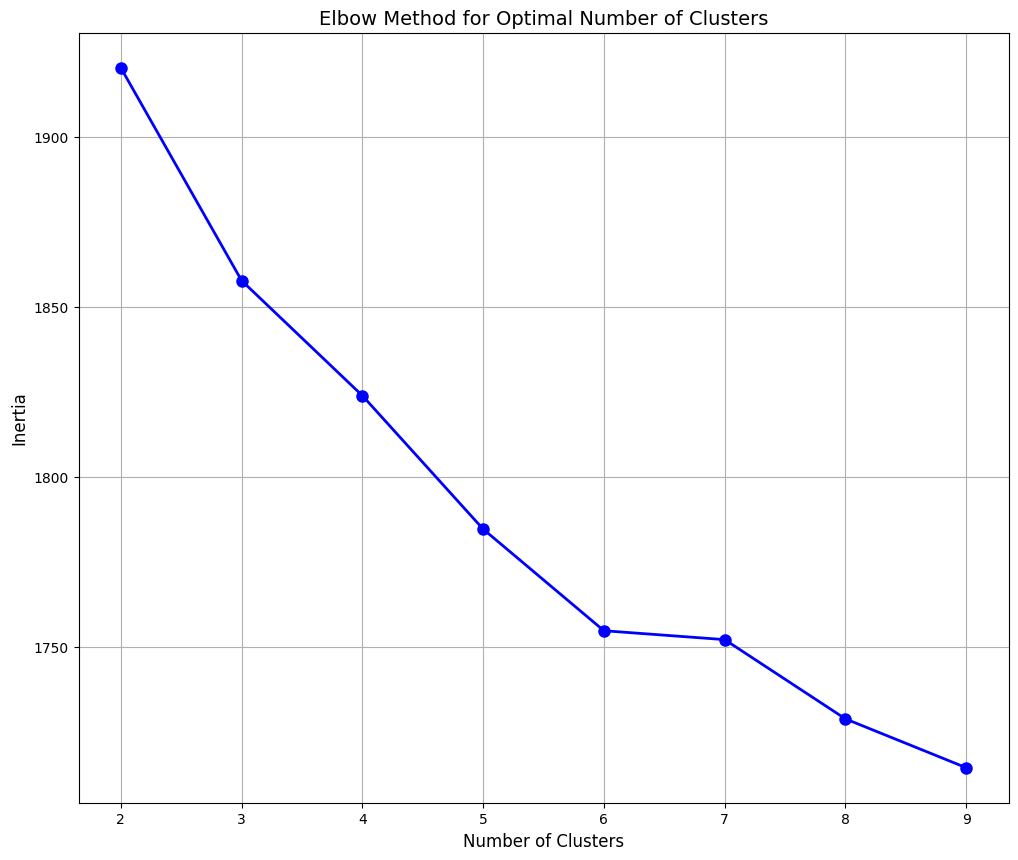

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

X = df_embeddings.values  # Convert DataFrame to NumPy array for clustering

range_n_clusters = range(2, 10)  # Test for 2 to 10 clusters
inertia_values = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)

    # Record the inertia for the current number of clusters
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to visualize the elbow
plt.figure(figsize=(12,10))
plt.plot(range_n_clusters, inertia_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Choose the optimal number of clusters based on the "elbow" in the graph


Optimal number of clusters: 5
Silhouette scores: [(2, 0.5265943370012265), (3, 0.4165398785551603), (4, 0.5355811517257677), (5, 0.5377089353281891), (6, 0.4938491239838253), (7, 0.3546277965087008), (8, 0.2441025416859854), (9, 0.2384630479805234), (10, 0.2286364146261398), (11, 0.22870425247719392), (12, 0.2113280458737973), (13, 0.21208532504201258), (14, 0.17399890996016396), (15, 0.17451868320037422), (16, 0.04388051623736892), (17, 0.04301770657026165), (18, 0.04407255682424916), (19, 0.03962435080148492)]


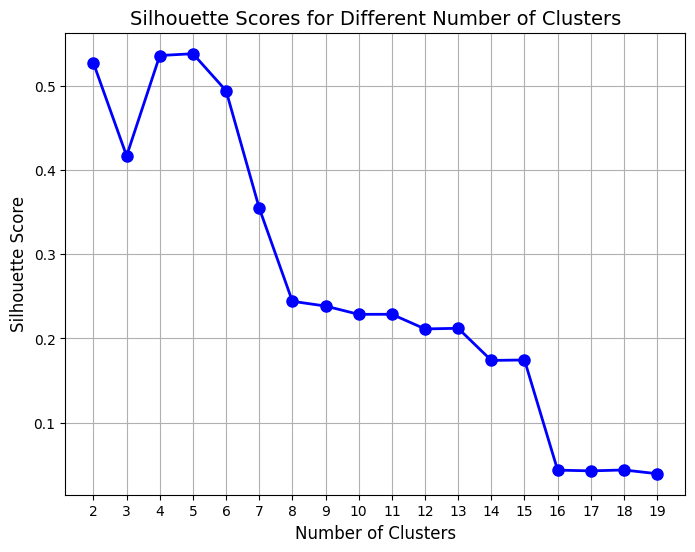

          0         1         2         3         4         5         6  \
0 -0.001706  0.039217 -0.016013  0.005016 -0.012647  0.058436  0.000912   
1  0.090950  0.070970 -0.012856  0.005892  0.045732  0.038966  0.042275   
2  0.053735  0.081081 -0.004594 -0.012233 -0.025025  0.025680  0.017698   
3  0.088613  0.098076 -0.060625 -0.020250  0.026385  0.065928  0.049923   
4  0.046112  0.049748 -0.011911 -0.005153  0.015412  0.035116 -0.000966   

          7         8         9  ...  503  504  505  506  507  508  509  510  \
0  0.028876 -0.001240  0.120347  ...    0    0    0    0    0    0    0    0   
1  0.046722 -0.032858  0.239356  ...    0    0    0    0    0    0    0    0   
2  0.055349  0.007500  0.149588  ...    0    0    0    0    0    0    0    0   
3  0.024320  0.039847  0.361891  ...    0    0    0    0    0    0    0    0   
4  0.070216 -0.006985  0.163356  ...    0    0    0    0    0    0    0    0   

   511  Cluster  
0    0        0  
1    0        0  
2    0        

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Assuming `df_embeddings` is already prepared
X = df_embeddings.values  # Convert DataFrame to NumPy array for clustering

# Determine the optimal number of clusters using silhouette score
range_n_clusters = range(2, 20)  # Test for 2 to 10 clusters
best_n_clusters = None
best_silhouette_score = -1
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Compute silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append((n_clusters, silhouette_avg))

    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters

# Display the results
print(f"Optimal number of clusters: {best_n_clusters}")
print(f"Silhouette scores: {silhouette_scores}")

# Plot silhouette scores for different cluster numbers
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, [score[1] for score in silhouette_scores], marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Silhouette Scores for Different Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Perform clustering with the optimal number of clusters
final_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
df_embeddings['Cluster'] = final_kmeans.fit_predict(X)

# Visualize the clustering results (optional)
print(df_embeddings.head())


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd

X = df_embeddings.values  # Convert DataFrame to NumPy array for clustering

# Perform KMeans clustering with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_embeddings['Cluster'] = kmeans.fit_predict(X)

# Display the results with the assigned cluster labels
print("Clustered data with 5 clusters:")
print(df_embeddings.head())


Clustered data with 5 clusters:
          0         1         2         3         4         5         6  \
0 -0.001706  0.039217 -0.016013  0.005016 -0.012647  0.058436  0.000912   
1  0.090950  0.070970 -0.012856  0.005892  0.045732  0.038966  0.042275   
2  0.053735  0.081081 -0.004594 -0.012233 -0.025025  0.025680  0.017698   
3  0.088613  0.098076 -0.060625 -0.020250  0.026385  0.065928  0.049923   
4  0.046112  0.049748 -0.011911 -0.005153  0.015412  0.035116 -0.000966   

          7         8         9  ...  503  504  505  506  507  508  509  510  \
0  0.028876 -0.001240  0.120347  ...    0    0    0    0    0    0    0    0   
1  0.046722 -0.032858  0.239356  ...    0    0    0    0    0    0    0    0   
2  0.055349  0.007500  0.149588  ...    0    0    0    0    0    0    0    0   
3  0.024320  0.039847  0.361891  ...    0    0    0    0    0    0    0    0   
4  0.070216 -0.006985  0.163356  ...    0    0    0    0    0    0    0    0   

   511  Cluster  
0    0        0  


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

X = df_embeddings.values  # Convert DataFrame to NumPy array for clustering

# Perform KMeans clustering with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_embeddings['Cluster'] = kmeans.fit_predict(X)

# Cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate the Euclidean distance between each pair of cluster centers
distances = np.linalg.norm(cluster_centers[:, np.newaxis] - cluster_centers, axis=2)

# Display the distance matrix
print("Euclidean distance matrix between clusters:")
print(distances)


Euclidean distance matrix between clusters:
[[0.         4.00346645 2.01361178 3.00516643 1.07005813]
 [4.00346645 0.         2.01176936 1.01705173 3.02632   ]
 [2.01361178 2.01176936 0.         1.03026118 1.03741746]
 [3.00516643 1.01705173 1.03026118 0.         2.04336028]
 [1.07005813 3.02632    1.03741746 2.04336028 0.        ]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Assuming df_embeddings and data['dadma_normalized_text'] are already prepared
X = df_embeddings.drop(columns=['Cluster']).values  # Only use feature columns for clustering

# Perform clustering with a fixed number of clusters (e.g., 20)
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_embeddings['Cluster'] = kmeans.fit_predict(X)

# Retrieve the cluster centers
cluster_centers = kmeans.cluster_centers_

# Function to calculate the Euclidean distance between a point and the center of the cluster
def calculate_distance(point, center):
    return np.linalg.norm(point - center)

# For each cluster, find the 5 samples closest to the center
for cluster_num in range(n_clusters):
    # Get the indices of the samples in the current cluster
    cluster_indices = df_embeddings[df_embeddings['Cluster'] == cluster_num].index

    # Get the embeddings of the samples in this cluster
    cluster_samples = df_embeddings.loc[cluster_indices].drop('Cluster', axis=1).values

    # Calculate the distances from each sample to the center of the cluster
    distances = [calculate_distance(sample, cluster_centers[cluster_num]) for sample in cluster_samples]

    # Sort the distances and get the indices of the 5 closest samples
    closest_indices = np.argsort(distances)[:5]

    # Print the closest 5 samples along with their clusters
    print(f"\nCluster {cluster_num} - Closest 5 samples:")
    for idx in closest_indices:
        comment = data['text'].iloc[cluster_indices[idx]]  # Get the text from the original dataset
        print(f"Index: {cluster_indices[idx]}, Comment: {comment}, Distance: {distances[idx]}")



Cluster 0 - Closest 5 samples:
Index: 4936, Comment: کسانی که سیم کارت رایتل دارند میتوانند رایگان بدون عضویت فیلمهای فیلیمو را ببینند, Distance: 0.14834297391762027
Index: 5453, Comment: لطفا فیلمای جدید چه ایرانی چه خارجی بزارین خارحیم با زیرنویسم بزارین خیلی خوبه خب بزارین دیه, Distance: 0.16386453683681768
Index: 9867, Comment: من از وقتی اشتراک فیلیمو رو خریدم واقعا دیگه تلویزیون و ماهواره نگاه نمیکردم هر روز صبح که پا میشدم از فیلمهای شما پلی میکردم .این اخرین باری بود که هزینه کردم و اشتراک خریدم.گفتم یه همچین چیزی با فرهنگ و تربیت ایرانی نمیخونه یه لحظه یادم رفت کجا و با چه ادمایی دارم زندگی میکنم.ادمایی که با وعده و وعید پول ملت رو میچاپن بعد یه لگد میزنن زیر همون قوانینی که بواسطش تونسته بودن برای مدت کوتاهی محبوب باشن به محض اینکه به نقطه ی اطمینان رسیدن شرایط رو عوض کنن و من اسم حرکت تیم شما رو میذارم دزدی تو روز روشن .البته بگم که خیلی ماهرانه عمل کردید .متاسفم, Distance: 0.16622734306323905
Index: 9033, Comment: لطفا فصل ۳ انیمه های توکیوغول وتایتان ها رو بزارید, Distanc

In [ ]:
# Print five samples from each cluster with their corresponding text from `data['dadma_normalized_text']`

# Loop through each cluster
for cluster in range(n_clusters):  # `n_clusters` is 20 in your case
    # Get indices of samples in the current cluster
    cluster_indices = df_embeddings[df_embeddings['Cluster'] == cluster].index

    # Get the first 5 samples from the current cluster
    sample_indices = cluster_indices[:10]

    print(f"\nCluster {cluster}:")

    # Loop through the selected sample indices
    for idx in sample_indices:
        # Get the corresponding text from `data['dadma_normalized_text']` based on the index
        comment = data['dadma_normalized_text'].iloc[idx]
        print(f"Index: {idx}, Comment: {comment}")



Cluster 0:
Index: 0, Comment: ادمین محترم فضای گالری آفلاین محدود نامحدود
Index: 1, Comment: حجم ایرانسل رایگان نیم بهاست تبلیغ رایگان
Index: 2, Comment: تبریک میگم تخفیف ادامه داره دوماه اشتراکمون باقیمونده
Index: 4, Comment: سلام ببخشید مرورگر تلویزیون وارد فیلیمو میشم فیلم پخش نمیکنه
Index: 13, Comment: سلام اینترنت ایرانسل اشتراک فیلیمو میشه فیلم تماشا حجم مصرفی نیم بهاست
Index: 24, Comment: افزار فیلیمو نکردم لینکشو ندارین
Index: 31, Comment: اینترنت مخابرات وارد فیلیمو میشم اشتراک بخرم حجم رایگان بتونم فیلم تماشا
Index: 34, Comment: دعوت صفحه مربوط وب سایت نقطه بازدید فرمایید
Index: 36, Comment: ⁦️⁩⁦️⁩⁦️⁩⁦️⁩⁦ آفرود طبیعت گردی ماشین شاسی بلند نمیخاد پیج فالو ببینی خبره دنیا
Index: 40, Comment: فیلیمو جان پیداش سرچ نشد فارسی زدم انگلیسی پاک

Cluster 1:
Index: 5, Comment: فیلم نوشتید زیرنویس فارسی نمیاره درحالی زیرنویس
Index: 7, Comment: فیلم خوبی العاده داستان واقعیه
Index: 8, Comment: ممنون اپلیکیشن خوبتون فصول سریال سریال مردگان متحرک بترسید دوبله کنین سریال طرفدار زیادی دارن تم

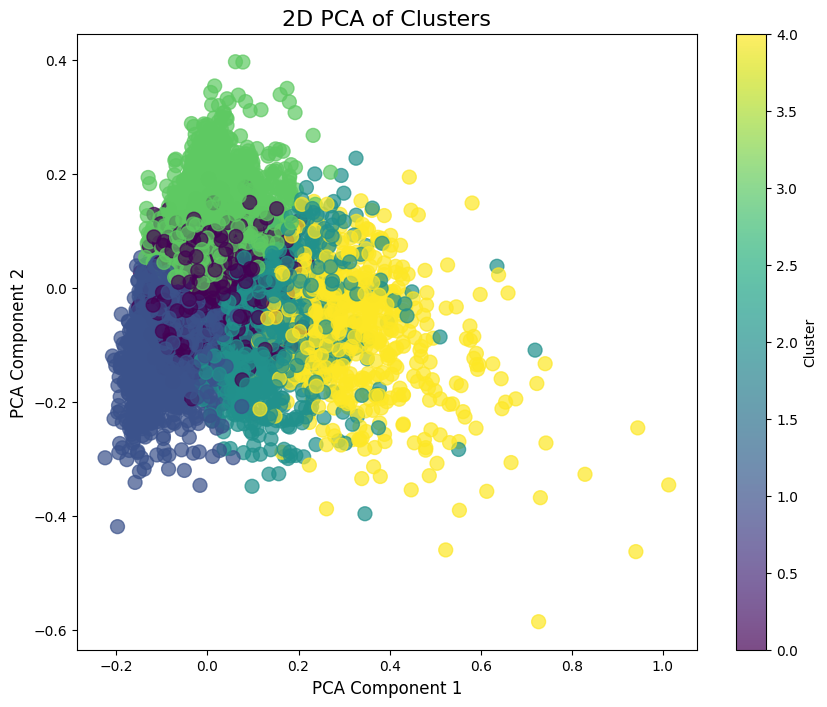

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the data to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # `X` contains the feature data

# Plot the 2D projection of the data points, colored by cluster
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_embeddings['Cluster'], cmap='viridis', marker='o', s=100, alpha=0.7)

# Add a colorbar to show the cluster numbers
plt.colorbar(label='Cluster')

# Set plot labels and title
plt.title('2D PCA of Clusters', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Show the plot
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
import pandas as pd

X = df_embeddings.values  # Convert DataFrame to NumPy array for clustering

# Apply KMeans clustering with 5 clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_embeddings['Cluster'] = kmeans.fit_predict(X)

# Display the results with cluster labels
print("Clustered data with 5 clusters:")
print(df_embeddings.head())

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, df_embeddings['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, df_embeddings['Cluster'])
print(f"Calinski-Harabasz Index: {ch_index}")

# Calculate Silhouette Score
sil_score = silhouette_score(X, df_embeddings['Cluster'])
print(f"Silhouette Score: {sil_score}")


Clustered data with 5 clusters:
          0         1         2         3         4         5         6  \
0 -0.001706  0.039217 -0.016013  0.005016 -0.012647  0.058436  0.000912   
1  0.090950  0.070970 -0.012856  0.005892  0.045732  0.038966  0.042275   
2  0.053735  0.081081 -0.004594 -0.012233 -0.025025  0.025680  0.017698   
3  0.088613  0.098076 -0.060625 -0.020250  0.026385  0.065928  0.049923   
4  0.046112  0.049748 -0.011911 -0.005153  0.015412  0.035116 -0.000966   

          7         8         9  ...  503  504  505  506  507  508  509  510  \
0  0.028876 -0.001240  0.120347  ...    0    0    0    0    0    0    0    0   
1  0.046722 -0.032858  0.239356  ...    0    0    0    0    0    0    0    0   
2  0.055349  0.007500  0.149588  ...    0    0    0    0    0    0    0    0   
3  0.024320  0.039847  0.361891  ...    0    0    0    0    0    0    0    0   
4  0.070216 -0.006985  0.163356  ...    0    0    0    0    0    0    0    0   

   511  Cluster  
0    0        0  
